<a href="https://colab.research.google.com/github/Poohi5/CMPE297/blob/master/Assignment_2/Assignment_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This colab demonstrates various Augmentations like mixup, label smoothing, cutout and test time.

### Using a subset of ImageNet dataset, this colab tries to demonstrate advanced augmentation techniques for image classification problem

In [1]:
!pip install fastai

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

#### Loading the Cifar dataset

In [3]:
path = untar_data(URLs.CIFAR)

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/cifar10/test'),
 PosixPath('/root/.fastai/data/cifar10/labels.txt'),
 PosixPath('/root/.fastai/data/cifar10/train')]

### Load the Cifar dataset into DataLoader object

In [5]:
bs = 64

In [6]:
train_path = path/'train'
test_path = path/'test'

In [7]:
data = ImageDataBunch.from_folder(path=path, train='train', valid='test', size=32, bs=bs, ds_tfms=get_transforms(), num_workers=0)
data.normalize(cifar_stats)

ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
deer,deer,deer,deer,deer
Path: /root/.fastai/data/cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
deer,deer,deer,deer,deer
Path: /root/.fastai/data/cifar10;

Test: None

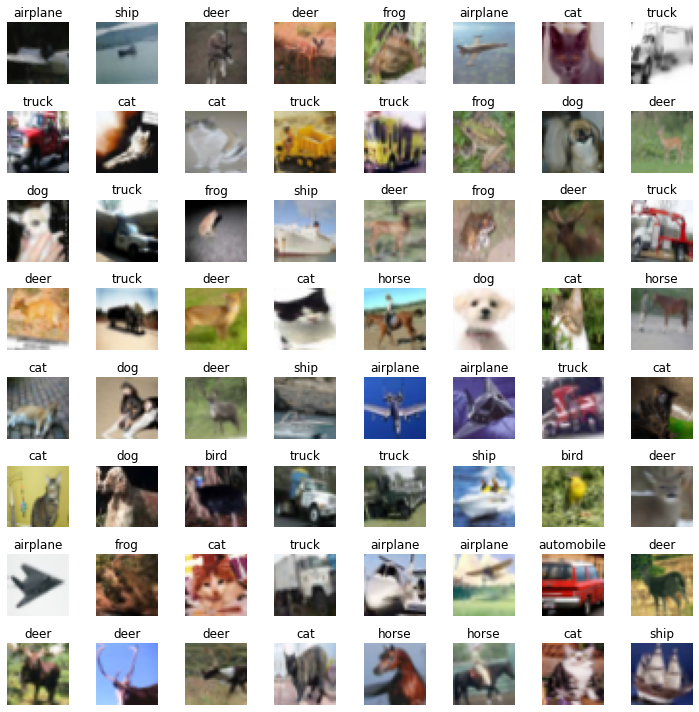

In [8]:
data.show_batch(rows=10, figsize=(10,10))

#### Below model serves as a baseline model (resnet34)

In [9]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.375063,1.135103,0.599600,01:59
1,1.008999,0.920023,0.682600,02:01
2,0.863051,0.752433,0.737200,02:00
3,0.821134,0.722380,0.744700,02:00


## Test time Augmentation

In [10]:
preds,targs = learn.TTA()
accuracy(preds, targs).item()

0.7807000279426575

** Accuracy improved from 74% to 77% **

##Mixup

In [11]:
learn = create_cnn(data, models.resnet34, metrics=accuracy).mixup()
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,1.738461,1.286784,0.562800,02:02
1,1.421179,0.962541,0.674100,02:02
2,1.319500,0.847790,0.719100,02:02
3,1.288283,0.811570,0.726700,02:01


##Label Smoothing

In [12]:
learn = create_cnn(data, models.resnet34, loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy)
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,1.589310,1.429162,0.591200,02:00
1,1.254083,1.181816,0.701000,02:01
2,1.182590,1.087264,0.735600,02:01
3,1.120884,1.067227,0.747400,02:00


## Cutout

In [13]:
tfms = [cutout(n_holes=(1,4), length=(8, 20), p=1.),cutout(n_holes=(1,4), length=(8,20), p=1.)]

In [14]:
data = ImageDataBunch.from_folder(path=path, train='train', valid='test', size=32, bs=bs, ds_tfms=tfms, num_workers=0)
data.normalize(cifar_stats)

ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
deer,deer,deer,deer,deer
Path: /root/.fastai/data/cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
deer,deer,deer,deer,deer
Path: /root/.fastai/data/cifar10;

Test: None

In [15]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,1.806073,1.643911,0.404400,01:15
1,1.434142,1.331559,0.523500,01:17
2,1.313054,1.213969,0.564400,01:16
3,1.265933,1.201410,0.576100,01:17
